# Proyecto 1- Parte final (Core) de Elida Peña

**Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.

In [31]:
#Importaciones de las librerías pandas, numpy y matplotlib
import pandas as pd

**Instrucciones Detalladas**

**Parte 1: Exploración y Visualización de Datos (EDA)**

**1. Carga y Exploración Inicial de Datos:**

* Cargar el dataset y revisar su estructura básica.

* Describir las variables y su distribución.

* Identificar y tratar valores nulos y outliers.


* Cargar el dataset y revisar su estructura básica.

In [32]:
path = '../data/retail_sales_dataset.csv'
df = pd.read_csv(path, sep=',', header=0)
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [33]:
# Ver las columnas del DataFrame
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [34]:
# Información general sobre el dataset
print(df.info())

# Descripción estadística de las variables numéricas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    

* Describir las variables y su distribución.

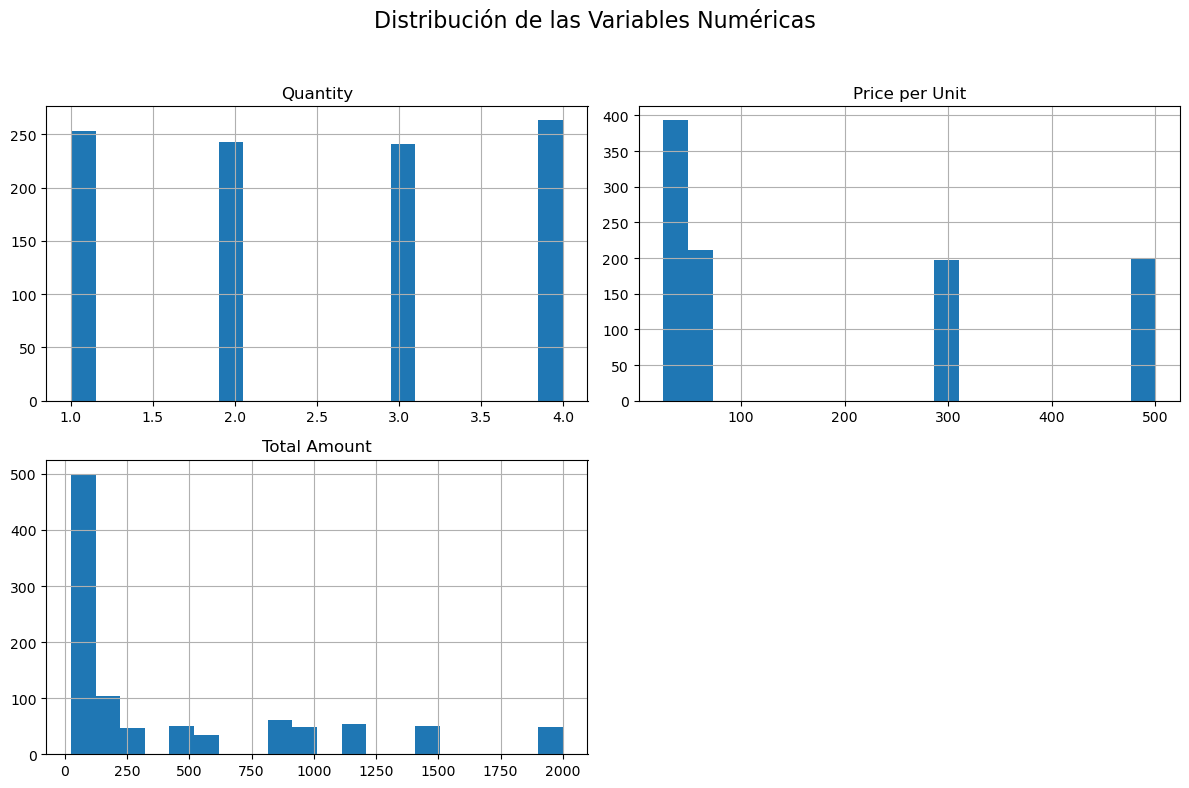

In [35]:
import matplotlib.pyplot as plt

# Histograma para cada variable numérica
df[['Quantity', 'Price per Unit', 'Total Amount']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribución de las Variables Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espacio para el título
plt.show()


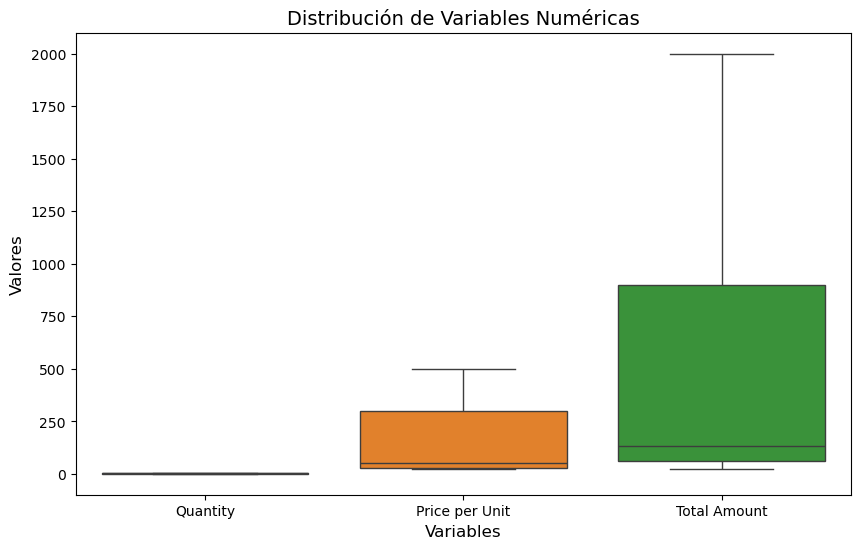

In [36]:
import seaborn as sns

# Boxplot para las variables numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Quantity', 'Price per Unit', 'Total Amount']])
plt.title('Distribución de Variables Numéricas', fontsize=14)
plt.ylabel('Valores', fontsize=12)
plt.xlabel('Variables', fontsize=12)
plt.show()


In [37]:
# explorar los valores atípicos más a fondo
# Filtrar los valores atípicos en Total Amount
outliers = df[df['Total Amount'] > 1500]
print(outliers)


     Transaction ID        Date Customer ID  Gender  Age Product Category  \
14               15  2023-01-16     CUST015  Female   42      Electronics   
64               65  2023-12-05     CUST065    Male   51      Electronics   
71               72  2023-05-23     CUST072  Female   20      Electronics   
73               74  2023-11-22     CUST074  Female   18           Beauty   
88               89  2023-10-01     CUST089  Female   55      Electronics   
92               93  2023-07-14     CUST093  Female   35           Beauty   
108             109  2023-10-18     CUST109  Female   34      Electronics   
117             118  2023-05-16     CUST118  Female   30      Electronics   
123             124  2023-10-27     CUST124    Male   33         Clothing   
138             139  2023-12-15     CUST139    Male   36           Beauty   
151             152  2023-02-28     CUST152    Male   43      Electronics   
154             155  2023-05-17     CUST155    Male   31      Electronics   

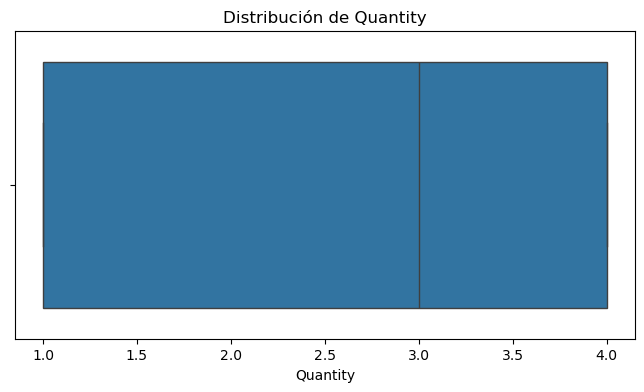

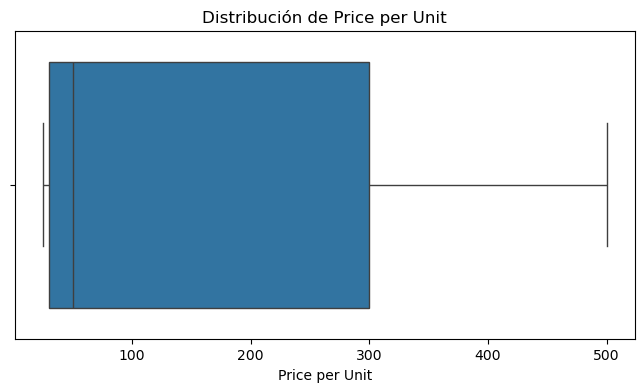

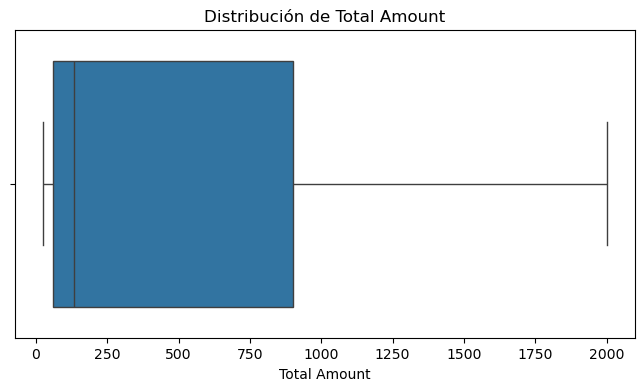

In [38]:
for column in ['Quantity', 'Price per Unit', 'Total Amount']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Distribución de {column}')
    plt.show()


* Identificar y tratar valores nulos y outliers.

In [39]:
# Verificar valores nulos en el DataFrame
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [40]:
# Definir las columnas a analizar para outliers
columns_to_check = ['Price per Unit', 'Total Amount']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers en {column}:")
    print(outliers)
    print(f"Número de outliers en {column}: {len(outliers)}")


Outliers en Price per Unit:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Número de outliers en Price per Unit: 0
Outliers en Total Amount:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Número de outliers en Total Amount: 0


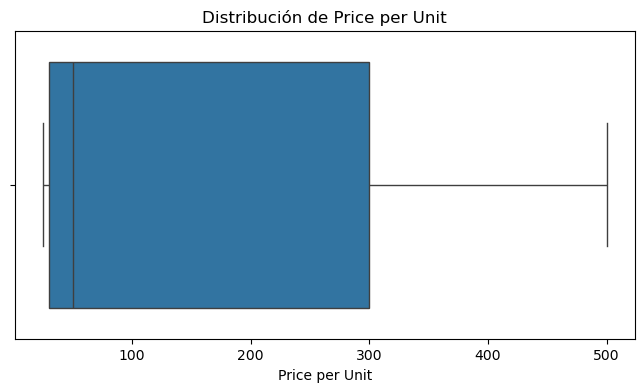

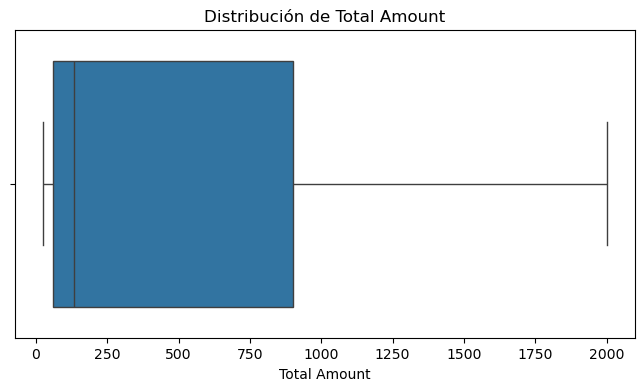

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar boxplots
for column in ['Price per Unit', 'Total Amount']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Distribución de {column}')
    plt.show()


In [42]:
columns_to_check = ['Quantity', 'Age']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers en {column}:")
    print(outliers)
    print(f"Número de outliers en {column}: {len(outliers)}")


Outliers en Quantity:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Número de outliers en Quantity: 0
Outliers en Age:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Número de outliers en Age: 0


**2. Análisis de Correlación:**

* Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

Transformacion de datos

In [43]:
# Transformar columnas al tipo de dato adecuado
df['Transaction ID'] = df['Transaction ID'].astype('category')  # Identificador único
df['Date'] = pd.to_datetime(df['Date'])  # Fecha en formato datetime
df['Customer ID'] = df['Customer ID'].astype('category').cat.codes  # Convertir a numérico
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Convertir género a binario
df['Product Category'] = df['Product Category'].astype('category').cat.codes  # Categoría a numérico

# Verificar los tipos de datos actualizados
print(df.dtypes)



Transaction ID            category
Date                datetime64[ns]
Customer ID                  int16
Gender                       int64
Age                          int64
Product Category              int8
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [44]:
# Excluir Customer ID del análisis
correlation_matrix = df.drop(columns=['Customer ID']).corr()
print(correlation_matrix)


                  Transaction ID      Date    Gender       Age  \
Transaction ID          1.000000  0.045136 -0.010387  0.065191   
Date                    0.045136  1.000000  0.025604  0.005971   
Gender                 -0.010387  0.025604  1.000000 -0.002621   
Age                     0.065191  0.005971 -0.002621  1.000000   
Product Category        0.032407  0.055017 -0.034423  0.039186   
Quantity               -0.026623 -0.022356  0.028023 -0.023737   
Price per Unit         -0.060837 -0.003566  0.000961 -0.038423   
Total Amount           -0.075034  0.001869  0.001001 -0.060568   

                  Product Category  Quantity  Price per Unit  Total Amount  
Transaction ID            0.032407 -0.026623       -0.060837     -0.075034  
Date                      0.055017 -0.022356       -0.003566      0.001869  
Gender                   -0.034423  0.028023        0.000961      0.001001  
Age                       0.039186 -0.023737       -0.038423     -0.060568  
Product Category    

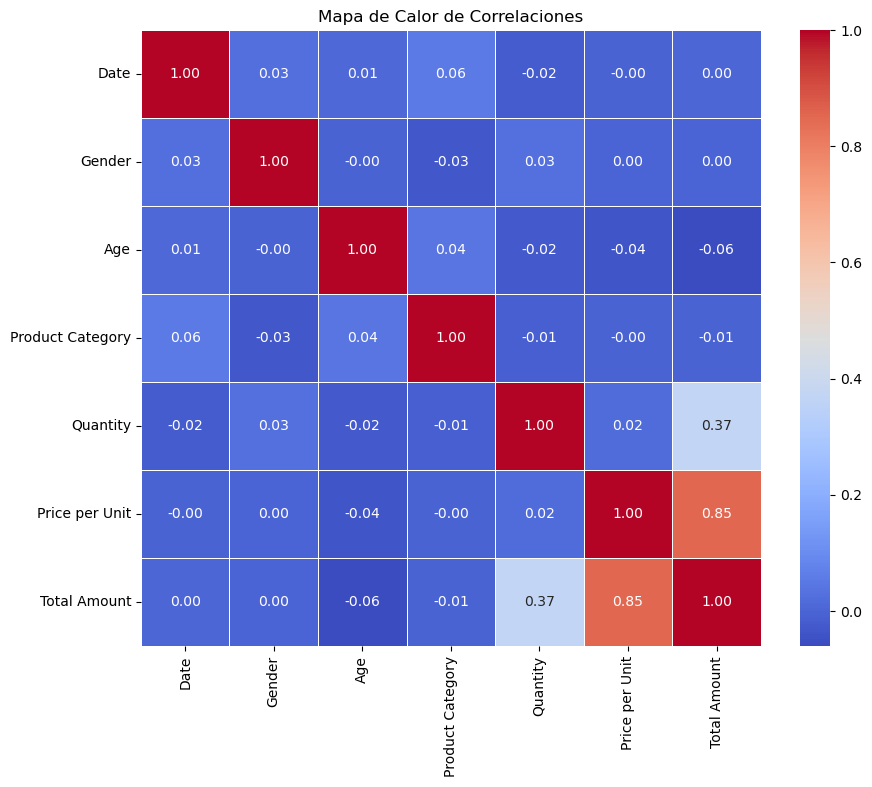

In [45]:
# Excluir columnas irrelevantes como Customer ID y Transaction ID
columns_to_exclude = ['Customer ID', 'Transaction ID']
correlation_matrix = df.drop(columns=columns_to_exclude).corr()

# Graficar el mapa de calor de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


**3. Visualización de Datos:**

* Crear subplots para comparar diferentes variables clave.

* Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.


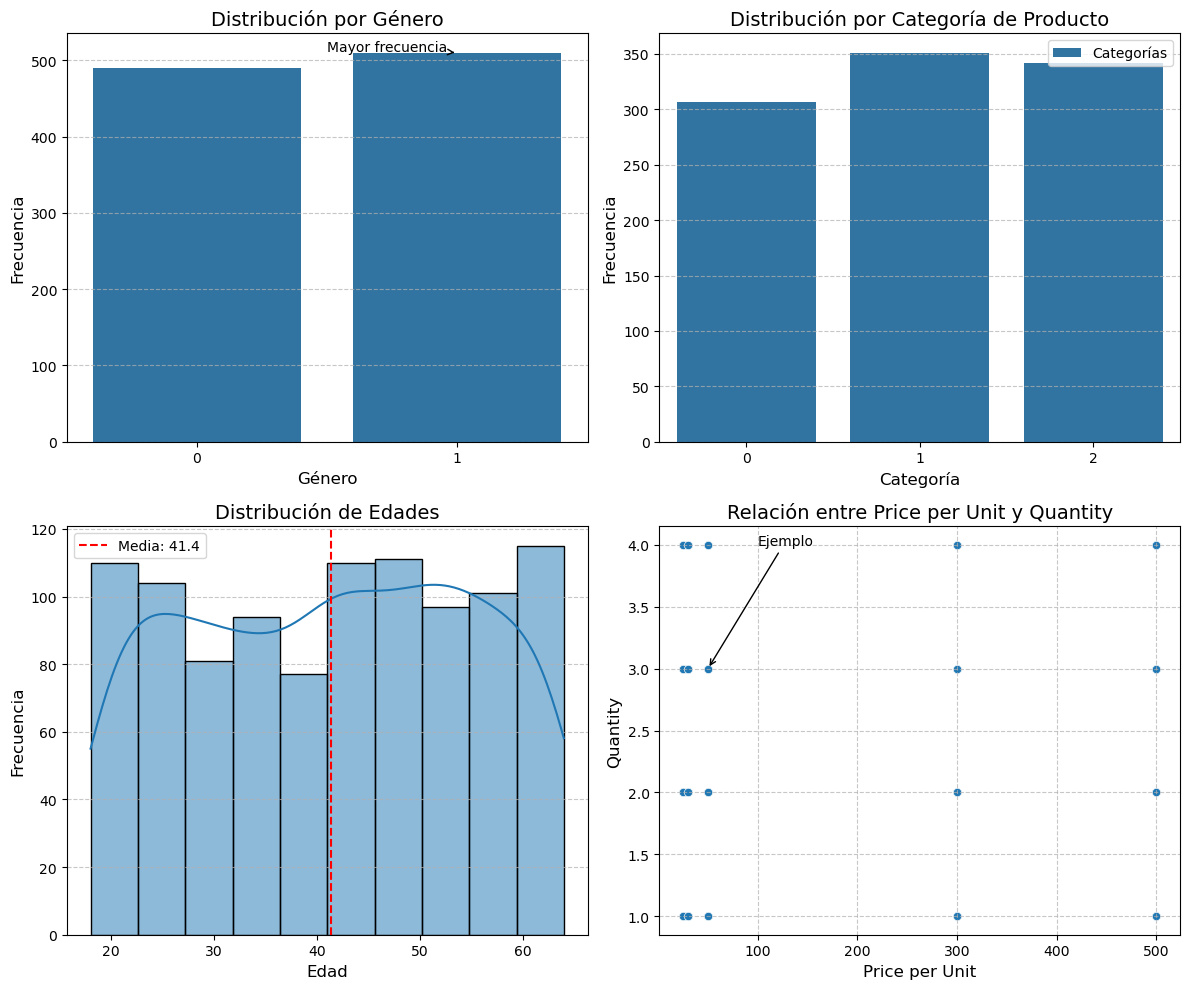

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un lienzo de 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Distribución por género
sns.countplot(x='Gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Género', fontsize=14)
axes[0, 0].set_xlabel('Género', fontsize=12)
axes[0, 0].set_ylabel('Frecuencia', fontsize=12)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)  # Añadir cuadrícula
# Añadir anotación para destacar el mayor grupo
axes[0, 0].annotate('Mayor frecuencia',
                    xy=(1, df['Gender'].value_counts().max()),
                    xytext=(0.5, df['Gender'].value_counts().max() + 2),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=10)

# Subplot 2: Distribución por categoría de producto
sns.countplot(x='Product Category', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribución por Categoría de Producto', fontsize=14)
axes[0, 1].set_xlabel('Categoría', fontsize=12)
axes[0, 1].set_ylabel('Frecuencia', fontsize=12)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)  # Añadir cuadrícula
# Añadir una leyenda para categorías
axes[0, 1].legend(['Categorías'], loc='upper right')

# Subplot 3: Histograma de edades
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Edades', fontsize=14)
axes[1, 0].set_xlabel('Edad', fontsize=12)
axes[1, 0].set_ylabel('Frecuencia', fontsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)  # Añadir cuadrícula
# Anotar la edad promedio
mean_age = df['Age'].mean()
axes[1, 0].axvline(mean_age, color='red', linestyle='--', label=f'Media: {mean_age:.1f}')
axes[1, 0].legend(fontsize=10)

# Subplot 4: Relación entre Price per Unit y Quantity
sns.scatterplot(x='Price per Unit', y='Quantity', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relación entre Price per Unit y Quantity', fontsize=14)
axes[1, 1].set_xlabel('Price per Unit', fontsize=12)
axes[1, 1].set_ylabel('Quantity', fontsize=12)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula
# Anotar un punto específico (si es relevante)
highlight = df.iloc[0]  # Usar la primera fila como ejemplo
axes[1, 1].annotate('Ejemplo',
                    xy=(highlight['Price per Unit'], highlight['Quantity']),
                    xytext=(highlight['Price per Unit'] + 50, highlight['Quantity'] + 1),
                    arrowprops=dict(facecolor='blue', arrowstyle='->'),
                    fontsize=10)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()



**Parte 2: Preprocesamiento de Datos**

**1. Transformación de Columnas:**

* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

* Realizar codificación de variables categóricas y escalado de variables numéricas.


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Definir las columnas categóricas y numéricas
categorical_columns = ['Gender', 'Product Category']
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),          # Escalar las columnas numéricas
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # Codificar las columnas categóricas
    ]
)

# Aplicar las transformaciones al dataset
transformed_data = preprocessor.fit_transform(df)

# Crear un nuevo DataFrame con las columnas transformadas
# Obtenemos los nombres de las nuevas columnas categóricas generadas por OneHotEncoder
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_columns = numerical_columns + list(categorical_features)

# Crear el nuevo DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=all_columns)

# Mostrar el nuevo DataFrame
print(transformed_df.head())


        Age  Quantity  Price per Unit  Total Amount  Gender_1  \
0 -0.540565  0.429265       -0.685123     -0.546704       0.0   
1 -1.125592 -0.453996        1.688464      0.971919       1.0   
2  0.629489 -1.337258       -0.790615     -0.761098       0.0   
3 -0.321180 -1.337258        1.688464      0.078611       0.0   
4 -0.833078 -0.453996       -0.685123     -0.636035       0.0   

   Product Category_1  Product Category_2  
0                 0.0                 0.0  
1                 1.0                 0.0  
2                 0.0                 1.0  
3                 1.0                 0.0  
4                 0.0                 0.0  


**2. Pipelines:**

* Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

In [48]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# # Definir columnas categóricas y numéricas
# categorical_columns = ['Gender', 'Product Category']
# numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# # Crear el ColumnTransformer para el preprocesamiento
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_columns),          # Escalar numéricas
#         ('cat', OneHotEncoder(drop='first'), categorical_columns)  # Codificar categóricas
#     ]
# )

# # Crear el pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)  # Solo preprocesamiento por ahora
# ])

# # Aplicar el pipeline al dataset
# transformed_data = pipeline.fit_transform(df)

# # Crear un DataFrame con los datos transformados
# categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
# all_columns = numerical_columns + list(categorical_features)
# transformed_df = pd.DataFrame(transformed_data, columns=all_columns)

# # Mostrar el DataFrame transformado
# print(transformed_df.head())

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Definir las columnas, revisa que estas correspondan a tu dataset
categorical_columns = ["Gender", "Product Category"]  # Asumiendo que estas son columnas categóricas
numerical_columns = ["Age", "Quantity", "Price per Unit", "Total Amount"]

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),  # Normalización para columnas numéricas
        ("cat", OneHotEncoder(drop="first"), categorical_columns)  # Codificación para columnas categóricas
    ]
)

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Supongo que tienes un DataFrame 'df' ya cargado, como en el ejemplo previo
# Transformar los datos
transformed_data = pipeline.fit_transform(df)

# Crear el DataFrame transformado
# Después de aplicar el OneHotEncoder, el número de columnas de las variables categóricas cambiará
all_columns = numerical_columns + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns))

# Crear el DataFrame final
transformed_df = pd.DataFrame(transformed_data, columns=all_columns)

# Mostrar los primeros resultados
print(transformed_df.head())



        Age  Quantity  Price per Unit  Total Amount  Gender_1  \
0 -0.540565  0.429265       -0.685123     -0.546704       0.0   
1 -1.125592 -0.453996        1.688464      0.971919       1.0   
2  0.629489 -1.337258       -0.790615     -0.761098       0.0   
3 -0.321180 -1.337258        1.688464      0.078611       0.0   
4 -0.833078 -0.453996       -0.685123     -0.636035       0.0   

   Product Category_1  Product Category_2  
0                 0.0                 0.0  
1                 1.0                 0.0  
2                 0.0                 1.0  
3                 1.0                 0.0  
4                 0.0                 0.0  


**Parte 3: Benchmarking de Técnicas de Machine Learning**

**1. Selección de Modelos:**

* Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).

* Utilizar validación cruzada para evaluar el rendimiento de los modelos.

In [49]:
if 'Date' in df.columns:
    print("La columna 'Date' existe en el DataFrame.")
else:
    print("La columna 'Date' no existe en el DataFrame.")




La columna 'Date' existe en el DataFrame.


In [50]:
print(df['Date'].isnull().sum())

0


In [51]:
# Extraer año, mes, día, etc.
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday  # Lunes=0, Domingo=6

print(df.head())


  Transaction ID       Date  Customer ID  Gender  Age  Product Category  \
0              1 2023-11-24            0       0   34                 0   
1              2 2023-02-27            1       1   26                 1   
2              3 2023-01-13            2       0   50                 2   
3              4 2023-05-21            3       0   37                 1   
4              5 2023-05-06            4       0   30                 0   

   Quantity  Price per Unit  Total Amount  year  month  day  weekday  
0         3              50           150  2023     11   24        4  
1         2             500          1000  2023      2   27        0  
2         1              30            30  2023      1   13        4  
3         1             500           500  2023      5   21        6  
4         2              50           100  2023      5    6        5  


In [52]:
# Extraer año, mes, día, etc.
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday  # Lunes=0, Domingo=6
# Eliminar la columna 'Date' ya que no es necesaria para el entrenamiento
df = df.drop(columns=['Date'])

print(df.head())


  Transaction ID  Customer ID  Gender  Age  Product Category  Quantity  \
0              1            0       0   34                 0         3   
1              2            1       1   26                 1         2   
2              3            2       0   50                 2         1   
3              4            3       0   37                 1         1   
4              5            4       0   30                 0         2   

   Price per Unit  Total Amount  year  month  day  weekday  
0              50           150  2023     11   24        4  
1             500          1000  2023      2   27        0  
2              30            30  2023      1   13        4  
3             500           500  2023      5   21        6  
4              50           100  2023      5    6        5  


In [53]:
# Verificar que el DataFrame tiene solo columnas numéricas
print(df.dtypes)

Transaction ID      category
Customer ID            int16
Gender                 int64
Age                    int64
Product Category        int8
Quantity               int64
Price per Unit         int64
Total Amount           int64
year                   int32
month                  int32
day                    int32
weekday                int32
dtype: object


In [54]:
X = df.drop('Total Amount', axis=1)  # Usamos todas las columnas menos la columna 'Total Amount'
y = df['Total Amount']  # La variable objetivo es 'Total Amount'


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [69]:
from sklearn.metrics import mean_squared_error, r2_score

results = {}  # Diccionario para almacenar los resultados

for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Realizar predicciones
    
    mse = mean_squared_error(y_test, y_pred)  # Calcular MSE
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    
    # Almacenar los resultados
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Convertir los resultados a un DataFrame para visualizar
import pandas as pd

results_df = pd.DataFrame(results).T  # Transponer para que los modelos estén como filas
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] Start training from score 454.062500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [60]:
# Verificar si todas las columnas en X_train son numéricas
print(X_train.dtypes)


Transaction ID      category
Customer ID            int16
Gender                 int64
Age                    int64
Product Category        int8
Quantity               int64
Price per Unit         int64
year                   int32
month                  int32
day                    int32
weekday                int32
dtype: object


In [62]:
# Eliminar columnas irrelevantes (Transaction ID y Date)
X_train = X_train.drop(columns=['Transaction ID', 'Date'], errors='ignore')
X_test = X_test.drop(columns=['Transaction ID', 'Date'], errors='ignore')

# Verificar si 'Gender' es de tipo numérico o categórico
# Si es de tipo texto, convertirla a categoría (si corresponde)
if X_train['Gender'].dtype == 'O':  # Si 'Gender' es de tipo object
    X_train['Gender'] = X_train['Gender'].astype('category').cat.codes
    X_test['Gender'] = X_test['Gender'].astype('category').cat.codes

# Eliminar cualquier columna que no sea numérica
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Verificar los tipos de datos de X_train después de la limpieza
print(X_train.dtypes)

# Asegurarse de que no haya valores nulos
print(X_train.isnull().sum())


Customer ID         int16
Gender              int64
Age                 int64
Product Category     int8
Quantity            int64
Price per Unit      int64
year                int32
month               int32
day                 int32
weekday             int32
dtype: object
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
year                0
month               0
day                 0
weekday             0
dtype: int64


In [29]:
df.columns = df.columns.str.replace(' ', '_')

* Utilizar validación cruzada para evaluar el rendimiento de los modelos.

In [78]:

from sklearn.model_selection import cross_val_score
import numpy as np

# Diccionario para almacenar los resultados de la validación cruzada
cv_results = {}

# Número de folds en la validación cruzada
cv_folds = 5

# Evaluación de modelos con validación cruzada
for name, model in models.items():
    # Usamos cross_val_score para obtener el R² en cada fold
    r2_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='r2')
    mse_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error')
    
    # Guardar los resultados del modelo (promedio y desviación estándar de R² y MSE)
    cv_results[name] = {
        'Mean R²': np.mean(r2_scores),
        'Std R²': np.std(r2_scores),
        'Mean MSE': -np.mean(mse_scores),  # Convertimos a positivo ya que el scoring devuelve valores negativos
        'Std MSE': np.std(mse_scores)
    }

# Convertir los resultados a un DataFrame para visualizar
import pandas as pd

cv_results_df = pd.DataFrame(cv_results).T  # Transponer para que los modelos estén como filas
print(cv_results_df)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 8
[LightGBM] [Info] Start training from score 460.429688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

* Realizar codificación de variables categóricas y escalado de variables numéricas.

**2. Comparación de Modelos:**
* Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

* Seleccionar el mejor modelo basado en las métricas obtenidas.

In [82]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos (asumimos que ya tienes un DataFrame `df` con características y etiquetas)
# Seleccionamos la variable objetivo 'Total Amount' para un problema de regresión
X = df.drop(columns=['Total Amount', 'Transaction ID', 'Customer ID'])  # No usamos 'Transaction ID' ni 'Customer ID'
y = df['Total Amount']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor()
}

# Diccionario para almacenar los resultados
results = {
    'Model': [],
    'R^2': [],
    'MSE': []
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Entrenamiento del modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Calcular las métricas de rendimiento
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Almacenar los resultados
    results['Model'].append(name)
    results['R^2'].append(r2)
    results['MSE'].append(mse)

# Crear un DataFrame para mostrar los resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados en la consola
print(results_df)

# Seleccionar el mejor modelo basado en R^2
best_model_index = results_df['R^2'].idxmax()
best_model = results_df.iloc[best_model_index]

print(f"\nMejor modelo basado en R^2: {best_model['Model']}")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 454.062500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

**Parte 4: Análisis de Métricas**

**1. Informe de Clasificación:**

* Generar un informe de clasificación para los modelos evaluados.

* Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.

                 Model  Precision    Recall  F1-Score
0  Logistic Regression      0.330  0.350995  0.270517
1        Random Forest      0.290  0.294138  0.288904
2                  SVM      0.355  0.371847  0.325966
3                  KNN      0.325  0.328594  0.314293


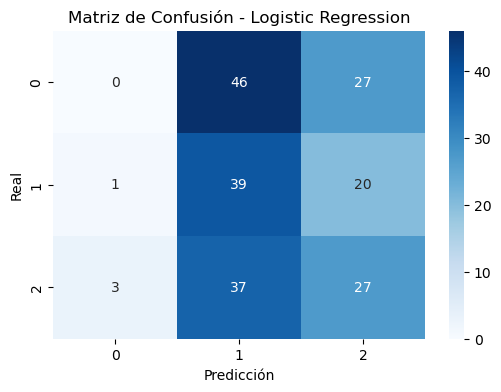

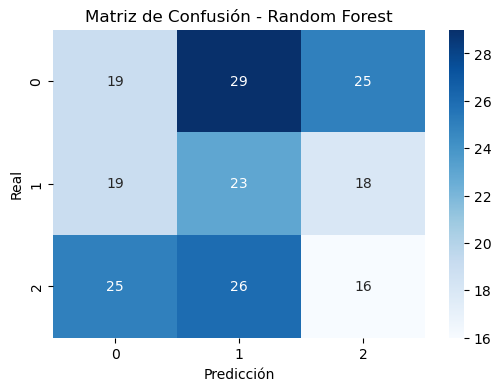

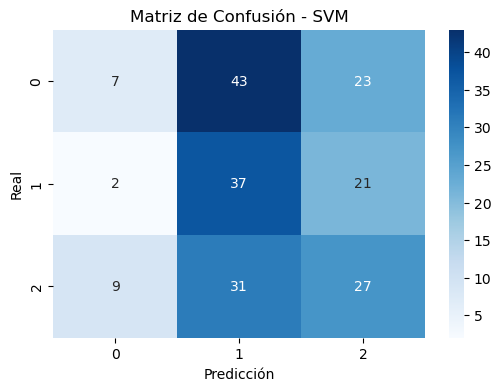

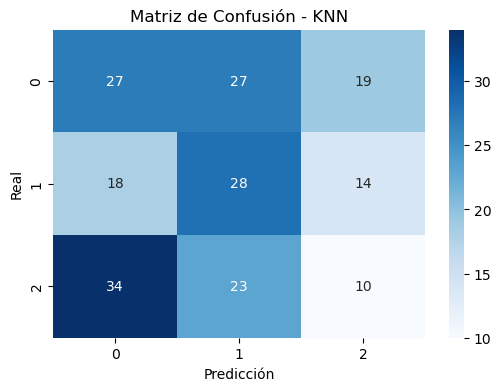

In [91]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame df


# Preprocesamiento
# 1. Eliminar las columnas que no necesitamos (por ejemplo, 'Transaction ID' y 'Customer ID')
#df = df.drop(columns=['Transaction ID', 'Customer ID'])

# 2. Codificar las variables categóricas (por ejemplo, 'Gender', 'Product Category')
categorical_cols = ['Gender', 'Product Category']  # Puedes cambiar si usas otras columnas
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 3. Definir las características (X) y la variable objetivo (y)
# Supongo que quieres predecir 'Product Category', pero puedes cambiar la variable objetivo si es necesario
X = df.drop(columns='Product Category')  # Cambia la variable objetivo si es necesario
y = df['Product Category']

# 4. Escalar las características (opcional, pero recomendado para algunos modelos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos de clasificación
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Entrenar y evaluar los modelos
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluación del modelo
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Agregar resultados al informe
    results.append({
        'Model': model_name,
        'Precision': report['accuracy'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    })

# Mostrar resultados
results_df = pd.DataFrame(results)

# Imprimir el resumen de las métricas
print(results_df[['Model', 'Precision', 'Recall', 'F1-Score']])

# Mostrar la matriz de confusión para cada modelo
for result in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matriz de Confusión - {result["Model"]}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


**2. Curva ROC y AUC:**
* Crear y visualizar la curva ROC para los modelos de clasificación binaria.

* Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

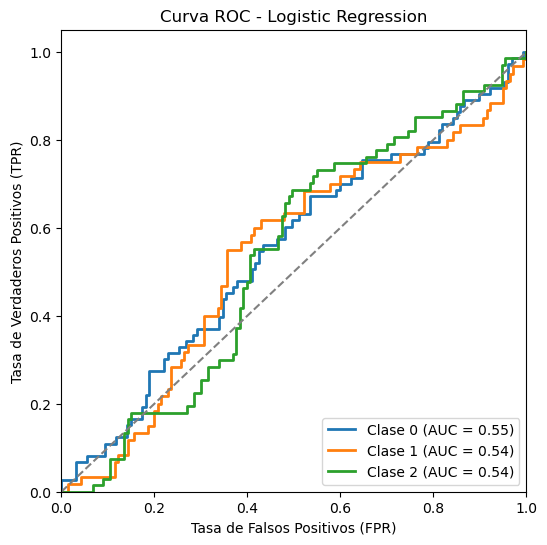

AUC para Logistic Regression, clase 0: 0.55
AUC para Logistic Regression, clase 1: 0.54
AUC para Logistic Regression, clase 2: 0.54


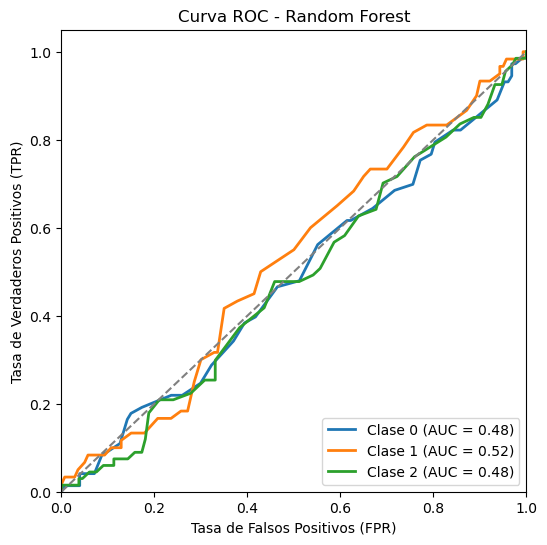

AUC para Random Forest, clase 0: 0.48
AUC para Random Forest, clase 1: 0.52
AUC para Random Forest, clase 2: 0.48


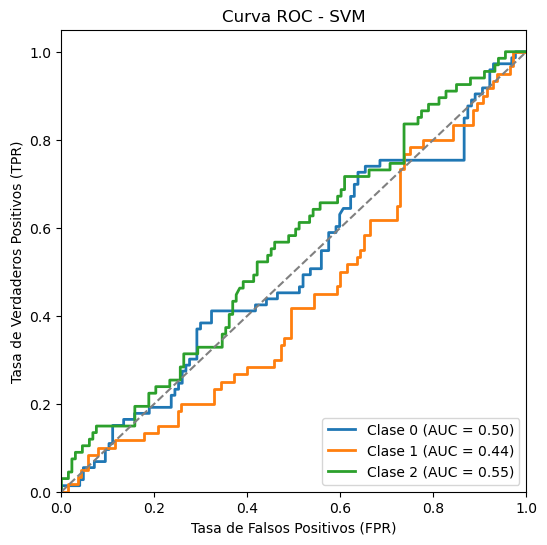

AUC para SVM, clase 0: 0.50
AUC para SVM, clase 1: 0.44
AUC para SVM, clase 2: 0.55


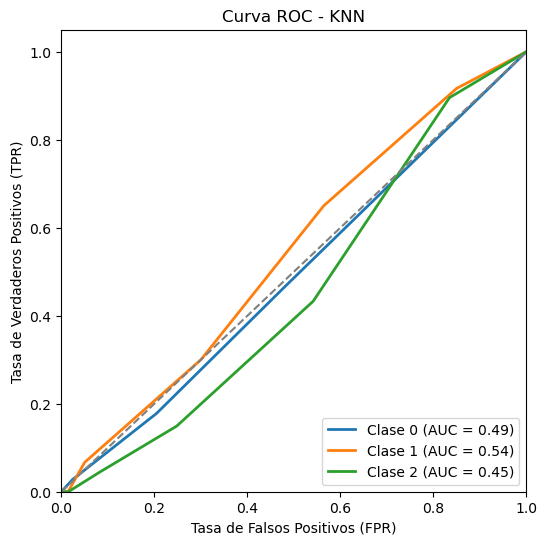

AUC para KNN, clase 0: 0.49
AUC para KNN, clase 1: 0.54
AUC para KNN, clase 2: 0.45


In [94]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que y_train y y_test son las etiquetas verdaderas
# Asumiendo que los modelos ya están entrenados

# Binarizar las etiquetas
n_classes = len(np.unique(y))  # Número de clases
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Entrenar los modelos (como lo hicimos antes)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Necesitamos habilitar las probabilidades para SVM
    'KNN': KNeighborsClassifier()
}

# Evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Obtener las probabilidades predichas para cada clase
    y_probs = model.predict_proba(X_test)
    
    # Inicializamos la figura para graficar
    plt.figure(figsize=(6, 6))
    
    # Calcular y graficar la curva ROC para cada clase
    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

    # Graficar la línea diagonal
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Ajustar el gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    # Calcular e imprimir el AUC para cada clase
    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        print(f"AUC para {model_name}, clase {i}: {roc_auc:.2f}")


**Parte 5: Presentación de Resultados**

**1. Preparación de la Presentación (One-Page en PPT):**

* Introducción y objetivos del proyecto.

* Descripción del conjunto de datos.

* Principales análisis y hallazgos.

* Visualizaciones clave con explicación.

* Conclusiones y recomendaciones.
